In [70]:
"""
Problem Set 3
Qutantitative Macro

Value Function Iteration with endogenous labour using discrete methods
"""


' \nProblem Set 3 \nQutantitative Macro \n\nValue Function Iteration with endogenous labour using discrete methods\n'

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import os

In [72]:
#os.chdir("path")

In [73]:
kMin = 10**-2
kMax = 4
kNum = 50
kGrid = np.linspace(kMin, kMax, kNum)
theta = 0.67
delta = 0.13
beta = 0.98

hNum = kNum
hGrid = np.linspace(0.01, 0.99, hNum)
kappa = 5.24
nu = 2

In [74]:

@np.vectorize
def utility(k, kPrime):

    return np.log(k**(1-theta) + (1-delta)*k - kPrime)

@np.vectorize
def cons( k, kPrime):

    return k**(1-theta) +(1-delta)*k - kPrime

@np.vectorize
def utilityLab(k, kPrime, h):

    return np.log(k**(1-theta)* h**theta + (1-delta)*k - kPrime) \
           - kappa*(h**(1 + 1/nu)/ 1 + 1/nu)

@np.vectorize
def consLab(k, kPrime, h):

    return k**(1-theta) * h**theta +(1-delta)*k - kPrime



In [75]:
%%time

M = np.zeros((kNum, kNum, kNum))

for (idi, h) in enumerate(hGrid):
    for (idj, k) in enumerate(kGrid):
        for (idh, kPRime) in enumerate(hGrid):

            M[idh, idi, idj] = utilityLab(k, kPRime, h)

C = np.zeros((kNum, kNum, kNum))

for (idi, h) in enumerate(hGrid):
    for (idj, k) in enumerate(kGrid):
        for (idh, kPRime) in enumerate(hGrid):

            C[idh, idi, idj] = consLab(k, kPRime, h)


M[C <= 0] = -500

V = np.zeros(kNum)

X = np.ones(np.shape(M))*-500


for h in range(kNum):
    for i in range(kNum):

        X[h][:, i] = M[h][:, i] + beta*V[i]

V1 = X.max(axis=(0,1))

OptimalPath = [V, V1]
PRuleK = []
PRuleH = []

niters = 1
while np.linalg.norm(V1 - V) > 10**-4 and niters<275:

    #W = V1.reshape(kNum, kNum)
    X = np.ones(np.shape(M))*-500
    for h in range(kNum):
        for i in range(kNum):

            X[h][:, i] = M[h][:, i] + beta*V1[i]

    V1 = X.max(axis=(0,1))

    gk = []
    gh = []
    for i in range(kNum):

        idh = np.where(X == V1[i])[0]
        idk = np.where(X == V1[i])[2]

        gk.append(kGrid[idk])
        gh.append(hGrid[idh])
        PRuleK.append(gk)
        PRuleH.append(gh)

    OptimalPath.append(V1)
    V1 = OptimalPath[-1]
    V = OptimalPath[-2]

    niters = niters + 1

<ipython-input-74-dc4cd0ab5ab3>:14: RuntimeWarning: invalid value encountered in log
  return np.log(k**(1-theta)* h**theta + (1-delta)*k - kPrime) \


Wall time: 20.5 s


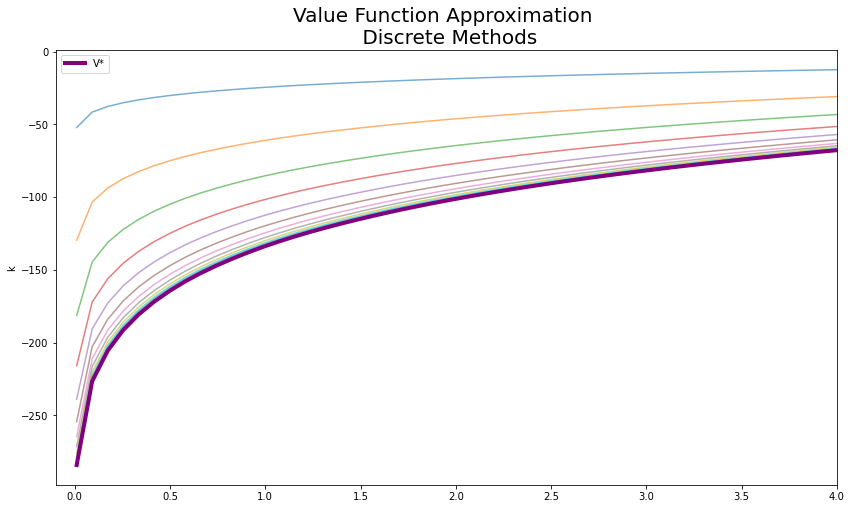

In [76]:
n = 20
fig, ax = plt.subplots(facecolor="w", figsize=(14, 8))
for i in OptimalPath[10::n]:
    ax.plot(kGrid, i, zorder=10, alpha=0.6)
ax.plot(kGrid, OptimalPath[-1], label="V*", linewidth=4, c="purple", zorder=50)
plt.title("Value Function Approximation \n Discrete Methods", fontsize=20)
plt.ylabel("k")
plt.xlim((-0.1, 4))
plt.legend()
fig.savefig("Discrete Endogenous Labour")


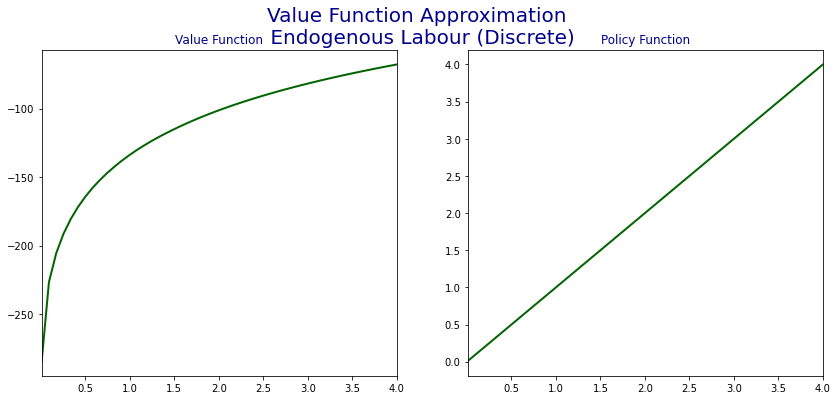

In [77]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, facecolor="w", figsize=(14,6))
fig.suptitle("Value Function Approximation \n Endogenous Labour (Discrete)", fontsize=20, c="darkblue")
ax1.plot(kGrid, V1, lw=2, c="darkgreen")
ax1.set_title("Value Function",c="darkblue")
ax1.set_xlim((kMin, kMax))

ax2.plot(kGrid, gk, lw=2,c="darkgreen")
ax2.set_title("Policy Function",c="darkblue")
ax2.set_xlim((kMin, kMax))
fig.savefig("Endogenous Labour")


In [78]:
%%time
"""
Monotonicty Speed
"""


M = np.zeros((kNum, kNum, kNum))

for (idi, h) in enumerate(hGrid):
    for (idj, k) in enumerate(kGrid):
        for (idh, kPRime) in enumerate(hGrid):

            M[idh, idi, idj] = utilityLab(k, kPRime, h)

C = np.zeros((kNum, kNum, kNum))

for (idi, h) in enumerate(hGrid):
    for (idj, k) in enumerate(kGrid):
        for (idh, kPRime) in enumerate(hGrid):

            C[idh, idi, idj] = consLab(k, kPRime, h)


M[C <= 0] = -500

V = np.zeros(kNum)
#W = V.reshape(kNum, kNum)
X = np.ones(np.shape(M))*-500


for h in range(kNum):
    for i in range(kNum):
        for j in range(kNum):

            X[h][i, j] = M[h][i, j] + beta*V[j]

V1 = X.max(axis=(0,1))

gk = []
gh = []
for i in range(kNum):

    idh = np.where(X == V1[i])[0]
    idk = np.where(X == V1[i])[2]

    gk.append(kGrid[idk])
    gh.append(hGrid[idh])
    PRuleK.append(gk)
    PRuleH.append(gh)

OptimalPath = [V, V1]

niters = 1

kLB = np.zeros(kNum)
kLB[0] = gk[0]

while np.linalg.norm(V1 - V) > 10**-4 and niters<275:

    for i in range(1, kNum):
        kLB[i] = gk[i-1]

    #W = V1.reshape(kNum, kNum)
    X = np.ones(np.shape(M))*-500
    for h in range(kNum):
        for i in range(kNum):
            if kGrid[j] >= kLB[i]:
                X[h][:, i] = M[h][:, i] + beta*V1[i]

    V1 = X.max(axis=(0,1))

    gk = []
    gh = []
    for i in range(kNum):

        idh = np.where(X == V1[i])[0]
        idk = np.where(X == V1[i])[2]

        gk.append(kGrid[idk])
        gh.append(hGrid[idh])
        PRuleK.append(gk)
        PRuleH.append(gh)

    OptimalPath.append(V1)
    V1 = OptimalPath[-1]
    V = OptimalPath[-2]

    niters = niters + 1

<ipython-input-74-dc4cd0ab5ab3>:14: RuntimeWarning: invalid value encountered in log
  return np.log(k**(1-theta)* h**theta + (1-delta)*k - kPrime) \


Wall time: 21.2 s


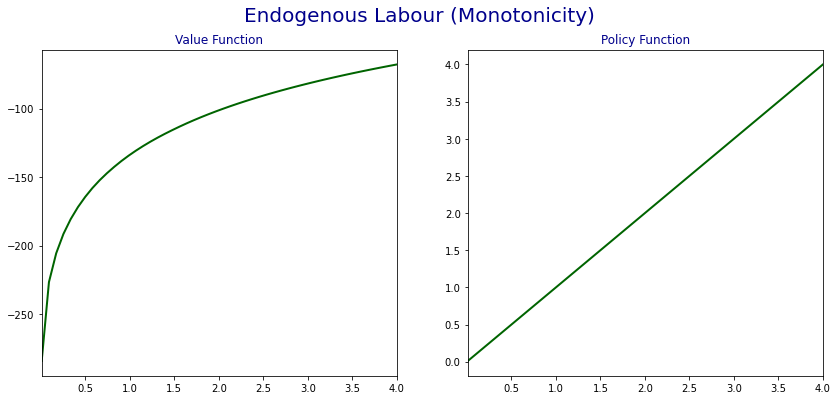

In [79]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, facecolor="w", figsize=(14,6))
fig.suptitle("Endogenous Labour (Monotonicity)", fontsize=20, c="darkblue")
ax1.plot(kGrid, V1, lw=2, c="darkgreen")
ax1.set_title("Value Function",c="darkblue")
ax1.set_xlim((kMin, kMax))

ax2.plot(kGrid, gk, lw=2,c="darkgreen")
ax2.set_title("Policy Function",c="darkblue")
ax2.set_xlim((kMin, kMax))
fig.savefig("Endogenous Labour Monotonicity")

In [80]:
%%time
"""
Concavity speed
"""
M = np.zeros((kNum, kNum, kNum))

for (idh, h) in enumerate(hGrid):
    for (idj, k) in enumerate(kGrid):
        for (idk, kPRime) in enumerate(kGrid):

            M[idh, idj, idk] = utilityLab(k, kPRime, h)

C = np.zeros((kNum, kNum, kNum))

for (idh, h) in enumerate(hGrid):
    for (idj, k) in enumerate(kGrid):
        for (idk, kPRime) in enumerate(kGrid):

            C[idh, idj, idk] = consLab(k, kPRime, h)


M[C <= 0] = -500

V = np.zeros(kNum)
V1 = np.zeros(kNum)
#W = V.reshape(kNum, kNum)
X = np.ones(np.shape(M))*-500


for h in range(kNum):
    for i in range(kNum):
        for j in range(kNum):
            if j == 0:
                X[h][i, j] = M[h][i, j] + beta*V[j]
            else:
                X[h][i, j] = M[h][i, j] + beta*V[j]
                if X[h][i, j-1] > X[h][i, j]:
                    V1[i] = X[h][i, j-1]
                    break


OptimalPath = [V, V1]
PRule = []
niters = 1

while np.linalg.norm(V1 - V) > 10**-4 and niters<275:

    #W = V1.reshape(kNum, kNum)
    X = np.ones(np.shape(M))*-500
    Vs = np.zeros(kNum)
    for h in range(kNum):
        for i in range(kNum):
            for j in range(kNum):
                if j == 0:
                    X[h][i, j] = M[h][i, j] + beta*V[j]
                else:
                    X[h][i, j] = M[h][i, j] + V[j]
                    if X[h][i, j-1] > X[h][i, j]:
                        Vs[i] = X[h][i, j-1]
                        break


    g = []
    for i in Vs[:-1]:
        idx = np.where(X == i)[1]
        g.append(kGrid[idx])
        PRule.append(g)

    OptimalPath.append(Vs)
    V1 = OptimalPath[-1]
    V = OptimalPath[-2]

    niters = niters + 1

<ipython-input-74-dc4cd0ab5ab3>:14: RuntimeWarning: invalid value encountered in log
  return np.log(k**(1-theta)* h**theta + (1-delta)*k - kPrime) \


Wall time: 6.64 s


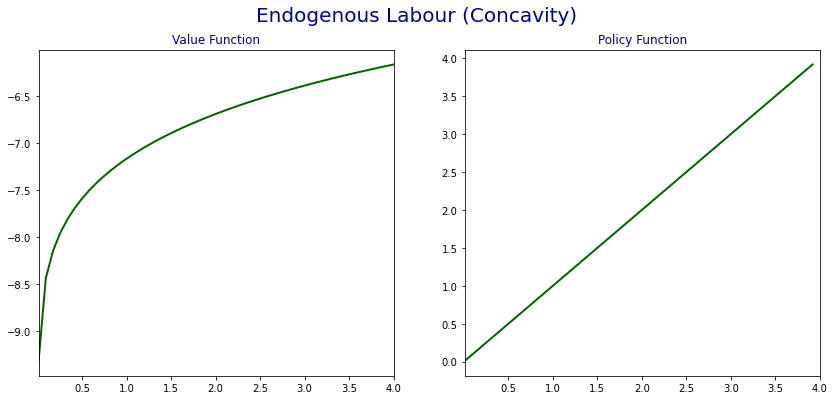

In [81]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, facecolor="w", figsize=(14,6))
fig.suptitle("Endogenous Labour (Concavity)", fontsize=20, c="darkblue")
ax1.plot(kGrid, V1, lw=2, c="darkgreen")
ax1.set_title("Value Function",c="darkblue")
ax1.set_xlim((kMin, kMax))

ax2.plot(kGrid[:-1], g, lw=2,c="darkgreen")
ax2.set_title("Policy Function",c="darkblue")
ax2.set_xlim((kMin, kMax))
fig.savefig("Endogenous Labour Concavity")



In [82]:
%%time

M = np.zeros((kNum, kNum, kNum))

for (idh, h) in enumerate(hGrid):
    for (idj, k) in enumerate(kGrid):
        for (idk, kPRime) in enumerate(kGrid):

            M[idh, idj, idk] = utilityLab(k, kPRime, h)

C = np.zeros((kNum, kNum, kNum))

for (idh, h) in enumerate(hGrid):
    for (idj, k) in enumerate(kGrid):
        for (idk, kPRime) in enumerate(kGrid):

            C[idh, idj, idk] = consLab(k, kPRime, h)


M[C <= 0] = -500

V = np.zeros(kNum)
V1 = np.zeros(kNum)
#W = V.reshape(kNum, kNum)
X = np.ones(np.shape(M))*-500


for h in range(kNum):
    for i in range(kNum):
        for j in range(kNum):
            if j == 0:
                X[h][i, j] = M[h][i, j] + beta*V[j]
            else:
                X[h][i, j] = M[h][i, j] + beta*V[j]
                if X[h][i, j-1] > X[h][i, j]:
                    V1[i] = X[h][i, j-1]
                    break


gk = []
gh = []
for i in range(kNum):

    idh = np.where(X == V1[i])[0]
    idk = np.where(X == V1[i])[2]

    gk.append(kGrid[idk])
    gh.append(hGrid[idh])
    PRuleK.append(gk)
    PRuleH.append(gh)

OptimalPath = [V, V1]

niters = 1

kLB = np.zeros(kNum)
kLB[0] = gk[0]


while np.linalg.norm(V1 - V) > 10**-4 and niters<275:

    for i in range(1, kNum):
        kLB[i] = gk[i-1]

    #W = V1.reshape(kNum, kNum)
    X = np.ones(np.shape(M))*-500
    Vs = np.zeros(kNum)
    for h in range(kNum):
        for i in range(kNum):
            for j in range(kNum):
                if j == 0:
                    X[h][i, j] = M[h][i, j] + beta*V[j]
                else:
                    if kGrid[j] >= kLB[i]:
                        X[h][i, j] = M[h][i, j] + beta*V[j]
                    if X[h][i, j-1] > X[h][i, j]:
                        Vs[i] = X[h][i, j-1]
                        break


    g = []
    for i in Vs[:-1]:
        idx = np.where(X == i)[1]
        g.append(kGrid[idx])
        PRule.append(g)

    OptimalPath.append(Vs)
    V1 = OptimalPath[-1]
    V = OptimalPath[-2]

    niters = niters + 1

<ipython-input-74-dc4cd0ab5ab3>:14: RuntimeWarning: invalid value encountered in log
  return np.log(k**(1-theta)* h**theta + (1-delta)*k - kPrime) \


Wall time: 6.45 s


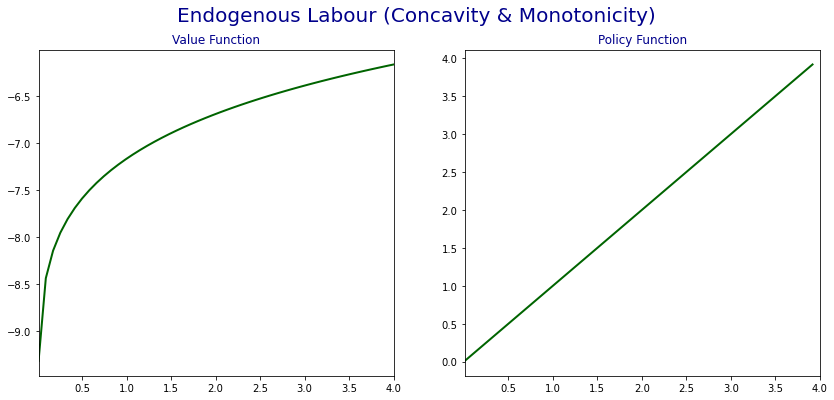

In [83]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, facecolor="w", figsize=(14,6))
fig.suptitle("Endogenous Labour (Concavity & Monotonicity)", fontsize=20, c="darkblue")
ax1.plot(kGrid, V1, lw=2, c="darkgreen")
ax1.set_title("Value Function",c="darkblue")
ax1.set_xlim((kMin, kMax))

ax2.plot(kGrid[:-1], g, lw=2,c="darkgreen")
ax2.set_title("Policy Function",c="darkblue")
ax2.set_xlim((kMin, kMax))
fig.savefig("Endogenous Labour Mon & Con")